In [5]:
!pip install sklearn

In [6]:
pip install  emoji

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=de18a8a83c464988be94b2f4da16f414526ea0f958ea52ac4d91a0eec40fcf45
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [7]:
from google.colab import files
uploaded = files.upload()

Saving weiboComments.csv to weiboComments.csv


In [9]:
import jieba
import re
import pandas as pd
from collections import Counter
import emoji

In [23]:
import io
df = pd.read_csv(io.BytesIO(uploaded['weiboComments.csv']))
comments = df['评论内容'][2:]
print(comments[:5])
print(comments.shape)
print(df.info())

2             制图@山川潜行
3              我最爱的冲冲
4    啊啊啊啊啊啊啊啊啊啊啊我来了疾冲
5          赏金猎人疾冲，太爱了
6                  疾冲
Name: 评论内容, dtype: object
(13902,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13904 entries, 0 to 13903
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   话题链接    13904 non-null  object
 1   话题内容    13904 non-null  object
 2   楼主ID    13904 non-null  object
 3   楼主昵称    13904 non-null  object
 4   楼主性别    13904 non-null  object
 5   发布日期    13904 non-null  object
 6   发布时间    13904 non-null  object
 7   转发量     13904 non-null  object
 8   评论量     13904 non-null  object
 9   点赞量     13904 non-null  object
 10  评论者ID   13904 non-null  object
 11  评论者昵称   13904 non-null  object
 12  评论者性别   13904 non-null  object
 13  评论日期    13904 non-null  object
 14  评论时间    13904 non-null  object
 15  评论内容    13859 non-null  object
dtypes: object(16)
memory usage: 1.7+ MB
None


In [11]:
comments.to_csv('userComments.csv')

# Data Preprocessing 

In [12]:
#------------------------------------Basic Segmentation-------------------------
cut_words = ''
all_words = ''
f = open('userComment.csv', 'w')
for line in open('userComments.csv', encoding='utf-8'):
  text = emoji.demojize(line)
  #remove emojis 
  clean_emojis = re.sub(':\\S+?:', '', text)
  #remove symbols
  clean_symbols = re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\\s]+', '', clean_emojis)
  seg_list = jieba.cut(clean_symbols,cut_all=False)
  #print(" ".join(seg_list))
  cut_words = (" ".join(seg_list))
  f.write(cut_words)
  all_words += cut_words

else:
  f.close()
# save output
all_words = all_words.split()
print(all_words[:50])

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.028 seconds.
Prefix dict has been built successfully.


['评论', '内容制图', '山川', '潜行我', '最', '爱', '的', '冲冲啊啊啊', '啊啊啊', '啊啊啊', '啊', '啊', '我', '来', '了', '疾冲赏金', '猎人', '疾冲', '太爱', '了疾冲肖战', '疾冲', '狼', '殿下', '肖战晚上', '好', '呀', '疾', '冲冲疾冲', '疾冲', '我', '的', '老公肖战', '疾冲', '晚安', '疾冲', '玖', '少年', '团肖战肖战大家', '多', '看看', '疾冲', '哦疾', '冲冲', '帅气', '潇洒', '玖', '少年', '团肖战晚上', '好', '呀', '冲', '呀疾', '冲冲', '小', '天才肖战', '疾冲', '狼', '殿下', '肖战', '江湖梦', '侠士', '情', '万军', '元帅', '世子', '魂', '逆风', '执酒', '赏金', '人侠骨', '柔情', '李炬', '峣啊', '啊啊啊', '疾冲冲冲好', '喜欢啊啊啊', '啊啊啊', '疾', '冲冲', '的', '小', '表情', '好', '可爱', '呀为什么', '要说', '汪东城', '油', '啊', '只是', '有点', '和', '时代', '脱轨', '的', '笨拙', '罢了', '颜值', '身材', '都', '保持', '得', '很', '好人', '又', '真诚', '怎么', '也', '和', '油腻', '扯不上', '关系', '吧大', '东', '不是', '油腻', '是', '做作', '从', '当初', '演戏', '开始', '就', '一直', '很', '做作哈哈哈', '她', '来', '了', '就', '笑', '死', '了笑', '死', '我', '了', '哈哈哈哈汪东城', '感觉', '人', '还是', '蛮', '真诚', '的', '就是', '觉得', '缺点', '什么', '魅力', '记得', '那时', '他', '有', '个', '外号', '叫卖', '牛蛙', '的', '我', '不', '晓得', '从', '哪里', '听来', '的', '的', '忘记', '了我', '觉得', '大家'

In [14]:
#remove stopwords
with open('hit_stopwords.txt') as f:
        stop_words = f.read().split('\n')
filter_space = lambda w: w not in stop_words
word_list = list(filter(filter_space, all_words))
print(word_list[:50])

['评论', '内容制图', '山川', '潜行我', '最', '爱', '冲冲啊啊啊', '啊啊啊', '啊啊啊', '疾冲赏金', '猎人', '疾冲', '太爱', '了疾冲肖战', '疾冲', '狼', '殿下', '肖战晚上', '好', '疾', '冲冲疾冲', '疾冲', '老公肖战', '疾冲', '晚安', '疾冲', '玖', '少年', '团肖战肖战大家', '看看', '疾冲', '哦疾', '冲冲', '帅气', '潇洒', '玖', '少年', '团肖战晚上', '好', '呀疾', '冲冲', '小', '天才肖战', '疾冲', '狼', '殿下', '肖战', '江湖梦', '侠士', '情', '万军', '元帅', '世子', '魂', '逆风', '执酒', '赏金', '人侠骨', '柔情', '李炬', '峣啊', '啊啊啊', '疾冲冲冲好', '喜欢啊啊啊', '啊啊啊', '疾', '冲冲', '小', '表情', '好', '可爱', '呀为什么', '要说', '汪东城', '油', '有点', '时代', '脱轨', '笨拙', '颜值', '身材', '都', '保持', '很', '好人', '真诚', '油腻', '扯不上', '关系', '吧大', '东', '不是', '油腻', '做作', '当初', '演戏', '很', '做作哈哈哈', '笑', '死', '了笑', '死', '哈哈哈哈汪东城', '感觉', '人', '蛮', '真诚', '觉得', '缺点', '魅力', '记得', '外号', '叫卖', '牛蛙', '不', '晓得', '听来', '忘记', '了我', '觉得', '大家', '说', '油', '调侃', '经常', '笑', '赵哥', '那样大', '东', '发型', '真的', '好好看', '哈哈哈哈', '哈哈哈哈', '做个', '半', '永久', '好', '刘海', '遮盖', '帅這', '一集', '汪東城', '小超', '好笑', '的哈哈哈哈', '哈哈哈', '直接', '暴走', '还', '可以视频', '来源', '网络', '侵删太', '好玩', '吧真的', '好', '逗', '啊哈哈哈', '笑', '死', '了

,word,frequency
0,少年,4379
1,博雅,1954
2,邓伦,1713
3,啊啊啊,1443
4,时代,1262
5,后援会,1201
6,雅集,1038
7,弟弟,933
8,大人,916
9,团啊啊啊,913


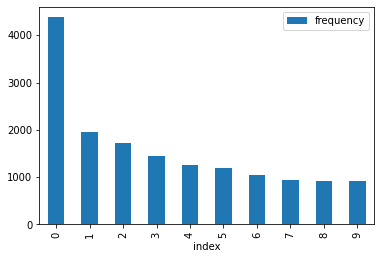

In [22]:
# frequency count 
c = Counter()
for x in all_words:
    if len(x)>1 and x != '\r\n':
        c[x] += 1

# draw a bar plot of the most frequent 10 words
df_top10_words = pd.DataFrame(data={
    "word": [count[0] for count in c.most_common(10)],
    "frequency": [count[1] for count in c.most_common(10)],
})
display(df_top10_words)
# Since it's hard to show Chinese characters on matplot, just use index for representation
df_top10_words.reset_index().plot(x='index', y='frequency', kind='bar')

In [16]:
pip install WordCloud

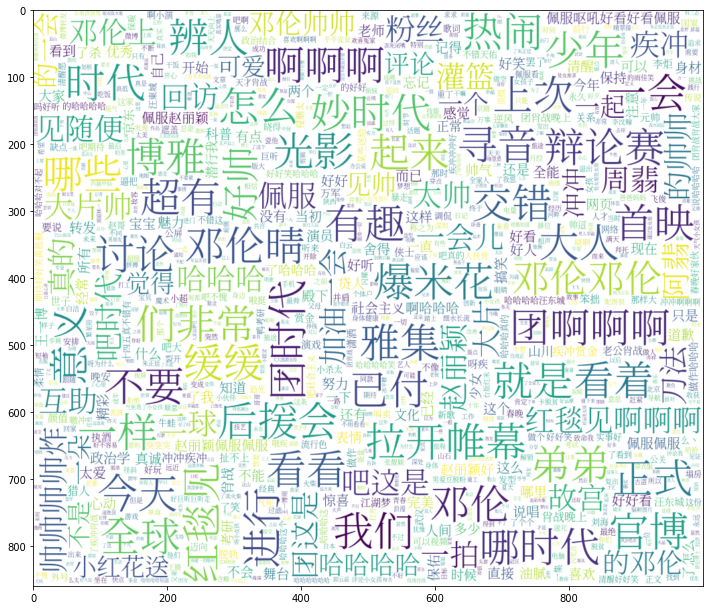

In [20]:
#------------------------------------generate word cloud------------------------------------
#font source https://github.com/amueller/word_cloud/raw/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf
from wordcloud import WordCloud
from matplotlib import pyplot as plt
font_path = 'SourceHanSerifK-Light.otf'
# append most common 1000 words 
words = []
for (k,v) in c.most_common(1000):
    words.append(str(k))

wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=1000, 
               max_font_size=60, random_state=42, width=1000, height=860, margin=2,)
wordcloud.generate(" ".join(words))

fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")

# Topic Analysis using LDA


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
#vectorize using tf
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(word_list)
tf_feature_names = tfidf.get_feature_names()


#apply lda
lda = LatentDirichletAllocation(n_components=10)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [49]:
# Define Search Param
search_params = {'n_components': [3, 5, 10], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online',random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(tfidf_matrix)

KeyboardInterrupt: ignored

In [34]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#select the top 20 words for each topic 
n_top_words = 10
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
弟弟 辩论赛 首映 邓伦晴 一拍 的帅帅 阿翡 可爱 佩服赵丽颖 真诚
Topic #1:
爆米花 已付 拉开帷幕 红毯见 缓缓 一会 一会儿 帅帅帅帅炸 太帅 冲冲
Topic #2:
邓伦 后援会 大人 妙时代 热闹 意义 啊哈哈哈 保佑 遮盖 吧社会主义
Topic #3:
博雅 不要 起来 看看 官博 光影 好帅 佩服 邓伦帅帅 佩服佩服
Topic #4:
们非常 团啊啊啊 讨论 红毯见啊啊啊 灌篮 邓伦上 哈哈哈 粉丝 刀法 一起
Topic #5:
有趣 进行 上次 辨人 加油一会 二球 的邓伦 大家 说唱 宝宝
Topic #6:
正式 交错 回访 互助 团这是 周翡 知道 贷人 政治学 努力
Topic #7:
少年 时代 团时代 超有 寻音 邓伦邓伦 大片帅 哈哈哈哈 赵丽颖好 有点
Topic #8:
啊啊啊 看着 哪时代 故宫 赵丽颖 吧时代 真的 评论 的一会 小红花送
Topic #9:
雅集 今天 全球 见随便 吧这是 疾冲 大片 肖战 没有 科普



In [27]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=48a1f5232804ab1e6aaafac05b2aa37496da55ce7a7bc22bccb09e7ca7c4da0c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [36]:
#Visualize LDA 
import pyLDAvis
import pyLDAvis.sklearn 
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tfidf_matrix, tfidf)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.439142  0.025952       1        1  12.914711
3     -0.012711 -0.420048       2        1  11.206055
2     -0.017453  0.150663       3        1  11.010369
4     -0.049842  0.039467       4        1   9.954848
8     -0.058670  0.038079       5        1   9.935364
1     -0.051714  0.038321       6        1   9.859123
5     -0.063314  0.033166       7        1   9.168714
0     -0.059713  0.033507       8        1   9.164478
9     -0.061445  0.032192       9        1   8.899327
6     -0.064279  0.028700      10        1   7.887010, topic_info=     Term         Freq        Total Category  logprob  loglift
1643   少年  3432.000000  3432.000000  Default  30.0000  30.0000
819    博雅  1677.000000  1677.000000  Default  29.0000  29.0000
3595   邓伦  1489.000000  1489.000000  Default  28.0000  28.0000
1180  啊啊啊  1363.000000  1363.000000  Default  27.0000  27.0000
3735   雅集  1094.000000  1094.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1684   巡回    17.310411    18.154661  Topic10  -5.5944   2.4923
2474   求求    16.082722    16.926972  Topic10  -5.6680   2.4888
1676   山石    14.855033    15.699283  Topic10  -5.7474   2.4847
571    做人    12.399656    13.243906  Topic10  -5.9281   2.4741
2638   父母    12.399656    13.243906  Topic10  -5.9281   2.4741

[355 rows x 6 columns], token_table=      Topic      Freq Term
term                      
9         7  0.982581   一下
18        6  0.998931   一会
19        6  0.998536  一会儿
20        1  0.945964   一位
45        8  0.997384   一拍
...     ...       ...  ...
3788      5  0.956997   飞俊
3798      8  0.998425   首映
3811      4  0.974916   魅力
3812      1  0.908702   魔术
3818      8  0.982241  鸭考研

[325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 3, 5, 9, 2, 6, 1, 10, 7])

In [38]:
pyLDAvis.save_html(pyLDAvis.sklearn.prepare(lda, tfidf_matrix, tfidf), 'lda.html') 